In [1]:
import pandas as pd

## 练习1-开始了解你的数据¶
### 探索Chipotle快餐数据

#### 查看前10行内容

In [2]:
chipoPath = "./exercise_data/chipotle.tsv"
chipo = pd.read_csv(chipoPath, sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### 查看数据中有多少列

In [3]:
chipo.shape[1]

5

#### 打印全部的列名称

In [4]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

#### 查看数据集的索引

In [5]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

#### 被下单最多的商品是什么?

In [6]:
chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False)[:5]

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

In [7]:
chipo[['item_name','quantity']].groupby(by='item_name')['quantity'].sum().sort_values(ascending=False)[:5]

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

#### 在item_name这一列中, 一共有多少种商品被下单

In [8]:
chipo['item_name'].unique().size

50

In [9]:
chipo['item_name'].nunique()

50

In [10]:
chipo['item_name'].value_counts().size

50

#### 在choice_description中，下单次数最多的商品是什么？

In [11]:
chipo['choice_description'].value_counts().sort_values(ascending=False).head()

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

In [12]:
chipo['choice_description'].value_counts()[:5]

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

#### 一共有卖出多少件item(包含重复)

In [13]:
chipo['quantity'].sum()

4972

#### 在该数据集对应的时期内，收入(revenue)是多少

In [14]:
remove = lambda x: x[1:]
chipo['subtotal'] = (chipo['quantity'] * (chipo['item_price'].apply(remove).map(float)))
chipo['subtotal'].sum()

39237.02

#### 在该数据集对应的时期内，一共有多少订单？

In [15]:
chipo['order_id'].nunique()

1834

In [16]:
#### 每一单(order)对应的平均总价是多少？

In [17]:
chipo.groupby(by='order_id')['subtotal'].sum().mean()

21.39423118865867

In [18]:
chipo[['order_id','subtotal']].groupby('order_id').agg('sum').agg('mean')

subtotal    21.394231
dtype: float64

In [19]:
chipo[['order_id','subtotal']].groupby('order_id').agg('sum').mean()

subtotal    21.394231
dtype: float64

#### 一共有多少种不同的商品被售出？

In [20]:
chipo['item_name'].nunique()

50

## 练习2-数据过滤与排序
### 探索2012欧洲杯数据¶

In [21]:
import pandas as pd

In [22]:
euro12Path = "./exercise_data/Euro2012_stats.csv"

In [23]:
euro12 = pd.read_csv(euro12Path)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


#### 只选取 Goals 这一列

In [24]:
euro12.Goals.head()

0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64

In [25]:
euro12['Goals'].head()

0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64

In [26]:
euro12[['Goals']].head()

,Goals
0,4
1,4
2,4
3,5
4,3


In [27]:
euro12[:5][['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3


In [28]:
euro12[:5]['Goals']

0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64

In [29]:
euro12.loc[:5,'Goals']

0     4
1     4
2     4
3     5
4     3
5    10
Name: Goals, dtype: int64

In [30]:
euro12.loc[:5]['Goals']

0     4
1     4
2     4
3     5
4     3
5    10
Name: Goals, dtype: int64

In [31]:
euro12.iloc[:5,1]

0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64

#### 有多少球队参与了2012欧洲杯？

In [32]:
euro12.Team.nunique()

16

#### 该数据集中一共有多少列(columns)?

In [33]:
euro12.columns.size

35

#### 将数据集中的列Team, Yellow Cards和Red Cards单独存为一个名叫discipline的数据框

In [34]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


#### 对数据框discipline按照先Red Cards再Yellow Cards进行排序

In [35]:
discipline.sort_values(['Red Cards','Yellow Cards'],ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


#### 计算每个球队拿到的黄牌数的平均值

In [36]:
discipline['Yellow Cards'].mean()

7.4375

#### 找到进球数Goals超过6的球队数据

In [37]:
euro12[euro12.Goals>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [38]:
euro12.loc[euro12.Goals>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


#### 选取以字母G开头的球队数据

In [39]:
startG = lambda x:x[:1]=='G'
euro12[euro12.Team.apply(startG)]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [40]:
startG = lambda x:x[:1]=='G'
euro12[euro12.Team.map(startG)]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


#### 选取前7列

In [41]:
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


#### 选取除了最后3列之外的全部列

In [42]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


#### 找到英格兰(England)、意大利(Italy)和俄罗斯(Russia)的射中率(Shooting Accuracy)

In [43]:
lam = lambda x: x in ['England','Russia','Italy']
euro12[euro12.Team.apply(lam)][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## 练习3-数据分组
### 探索酒类消费数据¶

In [44]:
import pandas as pd

In [45]:
drinkPath = "./exercise_data/drinks.csv"
drinks = pd.read_csv(drinkPath)

In [46]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


#### 哪个大陆(continent)平均消耗的啤酒(beer)更多？

In [47]:
drinks.groupby('continent').sum().sort_values('beer_servings',ascending=False)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
EU,8720,5965,6400,387.8
AF,3258,866,862,159.4
SA,2101,1377,749,75.7
AS,1630,2677,399,95.5
OC,1435,935,570,54.1


#### 打印出每个大陆(continent)的红酒消耗(wine_servings)的描述性统计值

In [48]:
drinks.groupby('continent').wine_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


#### 打印出每个大陆每种酒类别的消耗平均值

In [49]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


#### 打印出每个大陆每种酒类别的消耗中位数

In [50]:
drinks.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


#### 打印出每个大陆对spirit饮品消耗的平均值，最大值和最小值

In [51]:
drinks.groupby('continent').spirit_servings.agg(['max','min','mean'])

,max,min,mean
continent,,,
AF,152,0,16.339623
AS,326,0,60.840909
EU,373,0,132.555556
OC,254,0,58.437500
SA,302,25,114.750000


## 练习4-Apply函数
### 探索1960 - 2014 美国犯罪数据

In [52]:
import numpy as np
import pandas as pd

In [53]:
crimePath = "./exercise_data/US_Crime_Rates_1960_2014.csv"
crime = pd.read_csv(crimePath)
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


#### 每一列(column)的数据类型是什么样的？

In [54]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
Year                  55 non-null int64
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: int64(12)
memory usage: 5.2 KB


#### 将Year的数据类型转换为 datetime64

In [55]:
crime.Year = pd.to_datetime(crime.Year, format = '%Y')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
Year                  55 non-null datetime64[ns]
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: datetime64[ns](1), int64(11)
memory usage: 5.2 KB


In [56]:
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


#### 将列Year设置为数据框的索引

In [57]:
crime.set_index('Year',inplace=True)

In [58]:
crime.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


#### 删除名为Total的列

In [59]:
crime.drop(columns=['Total'],inplace=True)
crime.columns

Index(['Population', 'Violent', 'Property', 'Murder', 'Forcible_Rape',
       'Robbery', 'Aggravated_assault', 'Burglary', 'Larceny_Theft',
       'Vehicle_Theft'],
      dtype='object')

#### 重新采样使数据间隔10年为一行,

In [60]:
crime.resample('10AS').mean()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,191505317.5,413493.0,4516090.0,10618.0,23672.0,163351.0,215852.0,1332110.0,2654770.0,529210.0
1970-01-01,212119329.8,960793.0,9138380.0,19223.0,55457.0,415902.0,470212.0,2848600.0,5315780.0,973990.0
1980-01-01,237137006.9,1407432.8,11704890.0,20643.9,86563.9,538310.9,761913.0,3307349.4,7204025.3,1193541.1
1990-01-01,261282525.8,1752704.8,11905349.9,21166.4,99882.7,574893.0,1056896.3,2675001.5,7767936.6,1462441.8
2000-01-01,294796911.7,1396805.6,10094436.9,16306.8,92249.9,423036.6,865212.4,2156517.6,6797029.1,1141283.4
2010-01-01,314029261.4,1214403.4,8819190.0,14573.4,84211.8,349961.8,752828.4,2025034.0,6080339.6,713816.0


#### 按照10年为间隔周期对数据框进行分组并求和
- population取10年内最大值

In [61]:
crimes = crime.resample('10AS').sum() # resample a time series per decades
# 用resample去得到“Population”列的最大值
population = crime['Population'].resample('10AS').max()
# 更新 "Population" 
crimes['Population'] = population
crimes

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


#### 何时是美国历史上生存最危险的年代？

In [62]:
crime.idxmax(0)

Population           2014-01-01
Violent              1992-01-01
Property             1991-01-01
Murder               1991-01-01
Forcible_Rape        1992-01-01
Robbery              1991-01-01
Aggravated_assault   1993-01-01
Burglary             1980-01-01
Larceny_Theft        1991-01-01
Vehicle_Theft        1991-01-01
dtype: datetime64[ns]

## 练习5-合并
### 探索虚拟姓名数据

In [63]:
import numpy as np
import pandas as pd

In [64]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
raw_data_1

{'subject_id': ['1', '2', '3', '4', '5'],
 'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
 'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

In [65]:
raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
raw_data_2

{'subject_id': ['4', '5', '6', '7', '8'],
 'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
 'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

In [66]:
raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
raw_data_3

{'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
 'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

#### 将上述的数据框分别命名为data1, data2, data3

In [67]:
data1 = pd.DataFrame(raw_data_1)
data1

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [68]:
data2 = pd.DataFrame(raw_data_2)
data2

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [69]:
data3 = pd.DataFrame(raw_data_3)
data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


#### 将data1和data2两个数据框按照行的维度进行合并，命名为all_data

In [70]:
allData = pd.concat([data1,data2])
allData

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


#### 将data1和data2两个数据框按照列的维度进行合并，命名为all_data_col

In [71]:
all_data_col = pd.concat([data1, data2], axis=1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


#### 按照subject_id的值对all_data和data3作合并

In [72]:
data3.merge(allData, on = 'subject_id')

,subject_id,test_id,first_name,last_name
0,1,51,Alex,Anderson
1,2,15,Amy,Ackerman
2,3,15,Allen,Ali
3,4,61,Alice,Aoni
4,4,61,Billy,Bonder
5,5,16,Ayoung,Atiches
6,5,16,Brian,Black
7,7,14,Bryce,Brice
8,8,15,Betty,Btisan


In [73]:
allData.merge(data3, on = 'subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


#### 对data1和data2按照subject_id作连接

In [74]:
pd.merge(data1, data2, on = 'subject_id',how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


#### 找到 data1 和 data2 合并之后的所有匹配结果

In [75]:
pd.merge(data1, data2, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


## 练习6-统计
### 探索风速数据

In [76]:
import pandas as pd
import datetime

In [77]:
dataPath = "./exercise_data/wind.data"

#### 将数据作存储并且设置前三列为合适的索引

In [78]:
data = pd.read_table(dataPath, sep='\s+', parse_dates=[[0,1,2]])
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [79]:
#### 去除异常年份数据， 2061年数据改为2061-100=1961年数据

def fix_(x):
    year = x.year-100 if x.year>1989 else x.year
    return datetime.date(year, x.month, x.day)

fix = lambda x: x-100 if x.year >1989 else x.year
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### 将日期设为索引，注意数据类型，应该是datetime64[ns]

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
Yr_Mo_Dy    6574 non-null object
RPT         6568 non-null float64
VAL         6571 non-null float64
ROS         6572 non-null float64
KIL         6569 non-null float64
SHA         6572 non-null float64
BIR         6574 non-null float64
DUB         6571 non-null float64
CLA         6572 non-null float64
MUL         6571 non-null float64
CLO         6573 non-null float64
BEL         6574 non-null float64
MAL         6570 non-null float64
dtypes: float64(12), object(1)
memory usage: 667.8+ KB


In [81]:
data['Yr_Mo_Dy'] = pd.to_datetime(data["Yr_Mo_Dy"])
data = data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### 对应每一个location，一共有多少数据值缺失

In [82]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

#### 对应每一个location，一共有多少完整的数据值

In [83]:
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

#### 对于全体数据，计算风速的平均值

In [84]:
data.mean().mean()

10.227982360836924

#### 创建一个名为loc_stats的数据框去计算并存储每个location的风速最小值，最大值，平均值和标准差

In [85]:
loc_stats = data.agg(['max','min','mean','std'])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


#### 创建一个名为day_stats的数据框去计算并存储所有location的风速最小值，最大值，平均值和标准差

In [86]:
loc_stats = data.agg(['max','min','mean','std'], axis=1)
loc_stats.head()

,max,min,mean,std
1961-01-01,18.50,9.29,13.018182,2.808875
1961-01-02,17.54,6.50,11.336364,3.188994
1961-01-03,18.50,6.17,11.641818,3.681912
1961-01-04,11.75,1.79,6.619167,3.198126
1961-01-05,13.33,6.17,10.630000,2.445356


#### 对于每一个location，计算一月份的平均风速

In [87]:
data['date'] = data.index
data['month'] = data['date'].apply(lambda date:date.month)
data['day'] = data['date'].apply(lambda date:date.day)
january_winds = data.query('month==1')
january_winds.loc[:,'RPT':"MAL"].mean()               

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [88]:
data[data['month']==1].loc[:,'RPT':"MAL"].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

#### 对于数据记录按照年为频率取样

In [89]:
data.query('month == 1 and day == 1').head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,day
Yr_Mo_Dy,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962-01-01,1,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963-01-01,1,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964-01-01,1,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965-01-01,1,1


#### 对于数据记录按照月为频率取样

In [90]:
data.query('day==1').head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,day
Yr_Mo_Dy,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,1961-02-01,2,1
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,1961-03-01,3,1
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,1961-04-01,4,1
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,1961-05-01,5,1


## 练习7-可视化
### 探索泰坦尼克灾难数据


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [92]:
titanicPath = './exercise_data/train.csv'

In [93]:
titanic = pd.read_csv(titanicPath)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 将PassengerId设置为索引

In [94]:
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 绘制一个展示男女乘客比例的扇形图

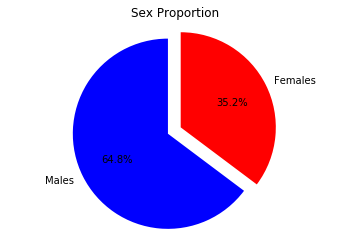

In [95]:
males = (titanic['Sex']=='male').sum()
females = (titanic['Sex']=='female').sum()

# put them into a list called proportions
proportions = [males, females]

# create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Males','Females'],

    # with no shadows
    shadow = False,
   
    # with colors
    colors = ['blue', 'red'],
    
    # with one slide exploded out
    explode = (0.15, 0 ),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title('Sex Proportion')
plt.show()

## 绘制一个展示船票Fare, 与乘客年龄和性别的散点图

(-5, 85)

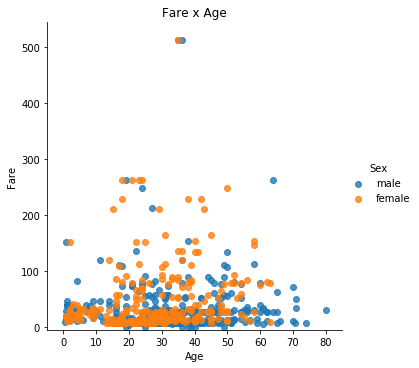

In [96]:
# creates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

## 有多少人生还？

In [97]:
titanic.Survived.sum()

342

## 绘制一个展示船票价格的直方图

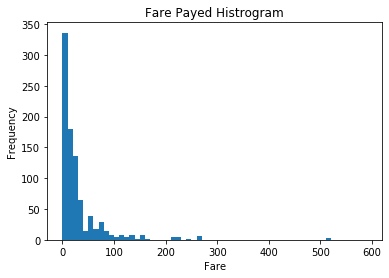

In [98]:
df = titanic.Fare.sort_values(ascending = False)
df

# create bins interval using numpy
binsVal = np.arange(0,600,10)
binsVal

# create the plot
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

# show the plot
plt.show()

## 创建数据框

In [99]:
import pandas as pd

In [100]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

### 将数据字典存为一个名叫pokemon的数据框中

In [101]:
pokemon = pd.DataFrame(raw_data)
pokemon.head()

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


### 数据框的列排序是字母顺序，请重新修改为name, type, hp, evolution, pokedex这个顺序

In [102]:
pokemon = pokemon[['name', 'type', 'hp', 'evolution','pokedex']]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


### 添加一个列place

In [103]:
pokemon['place'] = ['park','street','lake','forest']
pokemon

,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,park
1,Charmander,fire,39,Charmeleon,no,street
2,Squirtle,water,44,Wartortle,yes,lake
3,Caterpie,bug,45,Metapod,no,forest


### 查看每个列的数据类型

In [104]:
pokemon.dtypes

name         object
type         object
hp            int64
evolution    object
pokedex      object
place        object
dtype: object

## 时间序列
### 探索Apple公司股价数据¶


In [105]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
applePath = './exercise_data/Apple_stock.csv'
apple = pd.read_csv(applePath)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


#### 查看每一列的数据类型

In [107]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

#### 将Date这个列转换为datetime类型

In [108]:
apple.Date = pd.to_datetime(apple.Date)
apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

#### 将Date设置为索引

In [109]:
apple = apple.set_index('Date')
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


#### 有重复的日期吗？

In [110]:
apple.index.is_unique

True

#### 将index设置为升序

In [111]:
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


#### 找到每个月的最后一个交易日(business day)

In [112]:
# 
apple_month = apple.resample('BM').mean()
apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


#### 数据集中最早的日期和最晚的日期相差多少天？

In [113]:
diff = apple.index.max() - apple.index.min()
diff.days

12261

#### 在数据中一共有多少个月？

In [114]:
apple_months = apple.resample('BM').mean()
len(apple_months.index)

404

#### 按照时间顺序可视化Adj Close值

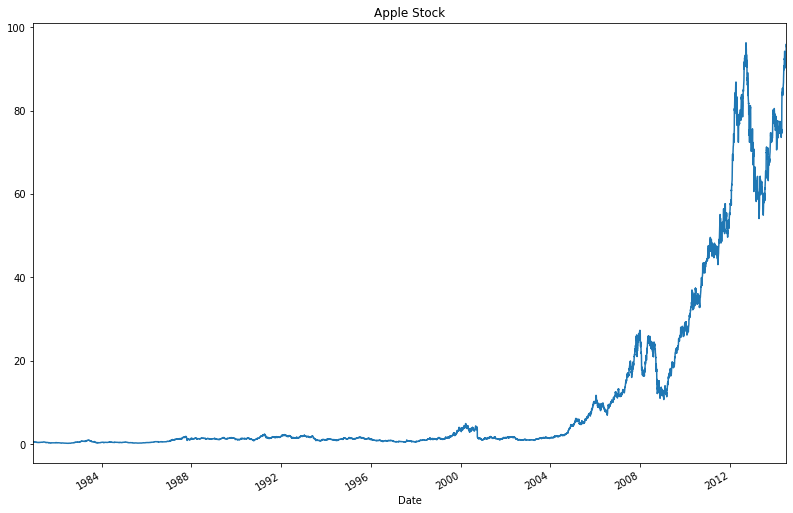

In [115]:
# 运行以下代码
# makes the plot and assign it to a variable
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

# changes the size of the graph
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)

## 删除数据
### 探索Iris纸鸢花数据

In [116]:
import pandas as pd

In [117]:
irisPath = './exercise_data/iris.csv'
iris = pd.read_csv(irisPath)
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


#### 创建数据框的列名称

In [118]:
iris = pd.read_csv(irisPath,names = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 数据框中有缺失值吗？

In [119]:
pd.isnull(iris).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

#### 将列petal_length的第10到19行设置为缺失值

In [120]:
iris.iloc[10:20,2:3] = np.nan
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### 将缺失值全部替换为1.0

In [121]:
iris.petal_length.fillna(1, inplace = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 删除列class

In [122]:
del iris['class']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### 将数据框前三行设置为缺失值

In [123]:
iris.iloc[0:3 ,:] = np.nan
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### 删除有缺失值的行

In [124]:
iris = iris.dropna(how='any')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2


#### 重新设置索引

In [125]:
iris = iris.reset_index(drop = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.6,3.1,1.5,0.2
1,5.0,3.6,1.4,0.2
2,5.4,3.9,1.7,0.4
3,4.6,3.4,1.4,0.3
4,5.0,3.4,1.5,0.2
